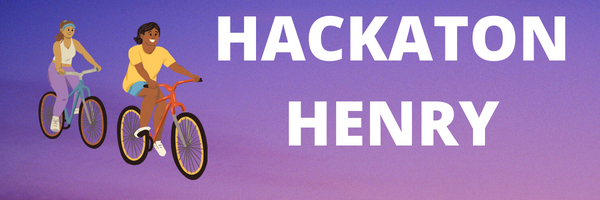

El siguiente trabajo que realice fue en base a 
trabajos de investigación donde muestran que el 
random forest. Permite trabajar de forma adecuada
el tipo de datos, primero contra la regresión lineal en forma de trabajos
de investigacición, hasta llegar a random forest.

En el paper:
Predicting Bike-Sharing Demand Using Random Forest
https://doi.org/10.1111/coin.12287
Los resultados muestran
que el modelo de RF tiene una alta precisión predictiva con un RMSE de 210
cnt/h, un MAE de 121 cnt/h y un R de 0,90. El rendimiento de la
El modelo de RF también se compara con un modelo de regresión lineal y muestra
precisión superior.

En cuanto al modelo de RNN podríamos decir lo siguiente:
    

Para resolver este problema, aportamos dos nuevos enfoques basados
en la memoria estándar a largo plazo (LSTM), 
que no solo puede aprovechar las entradas de funciones
múltiples y las salidas de pasos de múltiples tiempos para
mejorar la precisión de la predicción de bicicletas disponibles
en una sola vez. paso, pero también puede pronosticar el número 
de bicicletas en pasos de varios tiempos. Estos enfoques ayudarán
a las agencias de bicicletas compartidas a tomar una mejor decisión
para distribuir sus bicicletas a cada estibador de manera eficiente.
Los resultados experimentales confirmaron que nuestros modelos de 
pasos de múltiples funciones y de múltiples tiempos superan al modelo 
LSTM estándar.

https://www.kdnuggets.com/2019/06/random-forest-vs-neural-network.html

En comparación con LSTM y GBM ligero, Random Forest
mostró una mayor precisión y se desempeñó mejor con 
respecto a a los parámetros estadísticos utilizados para evaluar 
las predicciones (RMSE, MAE y R2). 


https://meetingorganizer.copernicus.org/EGU2019/EGU2019-3121-1.pdf#:~:text=Compared%20to%20LSTM%20and%20light%20GBM%2C%20Random%20Forests,among%20all%20the%20four%20air%20pollutants%20ex-%20amined.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import seaborn as sn
import matplotlib.pyplot as plt

from scipy import stats
import missingno as msno
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)


Las librerias para crear Random Forest son:
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    
para probar las metricas:
from sklearn.metrics import accuracy_score

para los dataframes:
    pandas

para los calculos matemáticos:
    numpy


El siguiente código presenta el dataframe de entrenamiento bike:
    

In [2]:
train_df = pd.read_csv('bike_train.csv')
train_df['data_set'] = 'train'
train_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,data_set
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,train
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,train
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,train
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,train
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,train


En el código de abajo, se esta convirtiendo la fecha agregandole
horas y minutos
también se busca si hay valores nan.

In [3]:
train_df["dteday"]= pd.to_datetime(train_df["dteday"])
train_df["dteday"]=pd.to_datetime(train_df["dteday"]) + pd.to_timedelta(train_df['hr'], unit='h')
train_df.head(5)
train_df.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
data_set      0
dtype: int64

In [4]:
train_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
data_set              object
dtype: object

In [5]:
print(train_df.head(5))

train_df = train_df.drop('data_set',axis=1)
train_df = train_df.drop('instant',axis=1)


   instant              dteday  season  yr  mnth  hr  holiday  weekday  \
0        1 2011-01-01 00:00:00       1   0     1   0        0        6   
1        2 2011-01-01 01:00:00       1   0     1   1        0        6   
2        3 2011-01-01 02:00:00       1   0     1   2        0        6   
3        4 2011-01-01 03:00:00       1   0     1   3        0        6   
4        5 2011-01-01 04:00:00       1   0     1   4        0        6   

   workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           0           1  0.24  0.2879  0.81        0.0       3          13   
1           0           1  0.22  0.2727  0.80        0.0       8          32   
2           0           1  0.22  0.2727  0.80        0.0       5          27   
3           0           1  0.24  0.2879  0.75        0.0       3          10   
4           0           1  0.24  0.2879  0.75        0.0       0           1   

   cnt data_set  
0   16    train  
1   40    train  
2   32    train  
3 

In [6]:
categoryVariableList = ["hr","weekday","mnth","season","weathersit","holiday","workingday"]
for var in categoryVariableList:
    train_df[var] = train_df[var].astype("category")

In [7]:
dailyData  = train_df.drop(["dteday"],axis=1)


<AxesSubplot:>

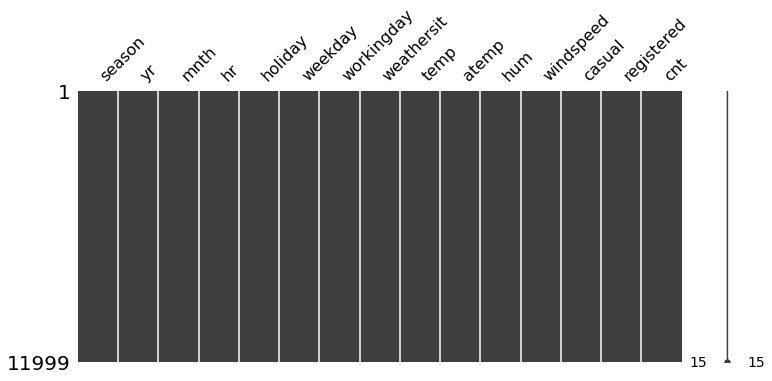

In [8]:
msno.matrix(dailyData,figsize=(12,5))

[Text(0.5, 0, 'Días laborables'),
 Text(0, 0.5, 'Contados'),
 Text(0.5, 1.0, 'Diagrama de cajas a lo largo de días laborales')]

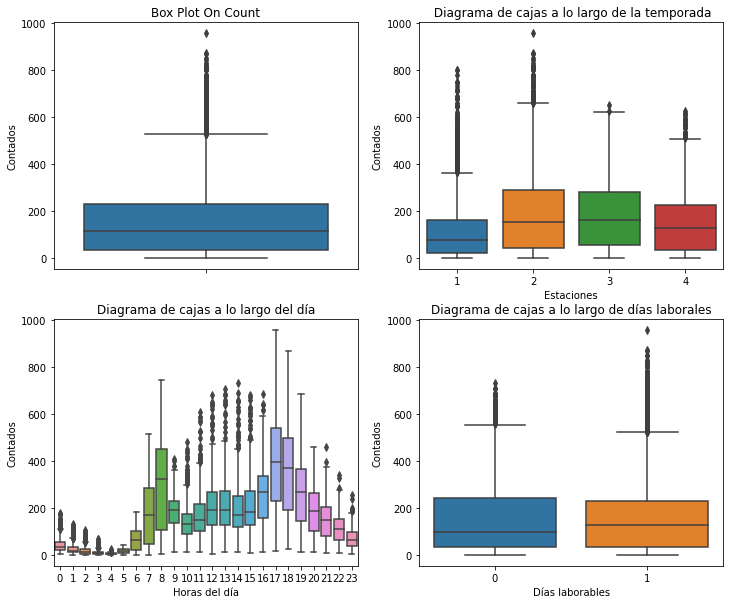

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=train_df,y="cnt",orient="v",ax=axes[0][0])
sn.boxplot(data=train_df,y="cnt",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=train_df,y="cnt",x="hr",orient="v",ax=axes[1][0])
sn.boxplot(data=train_df,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Contados',title="Box Plot On Count")
axes[0][1].set(xlabel='Estaciones', ylabel='Contados',title=" Diagrama de cajas a lo largo de la temporada")
axes[1][0].set(xlabel='Horas del día', ylabel='Contados',title="Diagrama de cajas a lo largo del día")
axes[1][1].set(xlabel='Días laborables', ylabel='Contados',title="Diagrama de cajas a lo largo de días laborales")

In [10]:
train_dfWithoutOutliers = train_df[np.abs(train_df["cnt"]-train_df["cnt"].mean())<=(3*train_df["cnt"].std())]

In [11]:
print ("Forma de los outliers en un inicio: ",train_df.shape)
print ("Forma de los outliers después: ",train_dfWithoutOutliers.shape)

Forma de los outliers en un inicio:  (11999, 16)
Forma de los outliers después:  (11846, 16)


<AxesSubplot:>

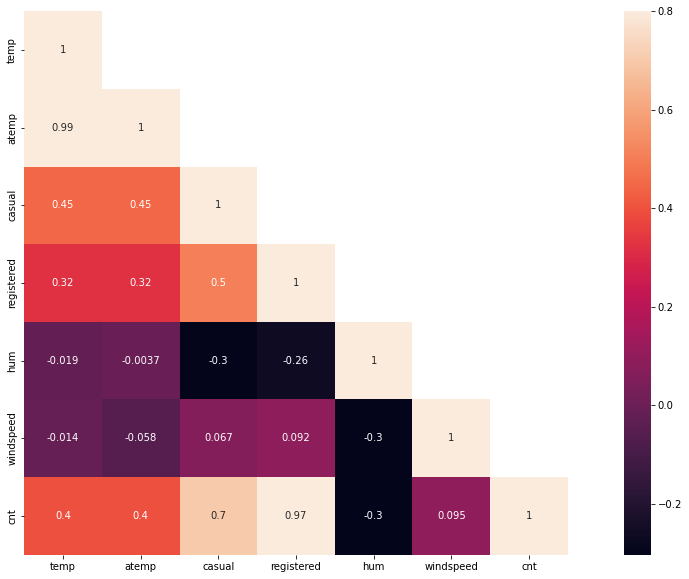

In [12]:
corrMatt = train_df[["temp","atemp","casual","registered","hum","windspeed","cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<AxesSubplot:xlabel='hum', ylabel='cnt'>

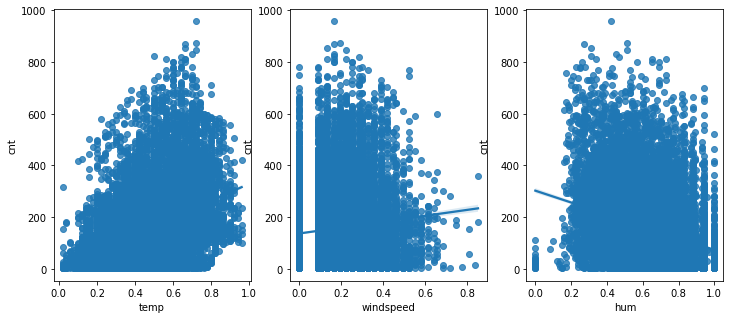

In [13]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="cnt", data=train_df,ax=ax1)
sn.regplot(x="windspeed", y="cnt", data=train_df,ax=ax2)
sn.regplot(x="hum", y="cnt", data=train_df,ax=ax3)

In [14]:
categoricalFeatureNames = ["season","holiday","workingday","weathersit","weekday","mnth","yr","hr"]
numericalFeatureNames = ["temp","hum","windspeed","atemp"]
dropFeatures = ['casual',"cnt","dtetime","registered"]

In [15]:
dataTrain  = train_df
dataTest  = test_df

NameError: name 'test_df' is not defined

In [ ]:
dataTrain = data[pd.notnull(data['cnt'])]
dataTest = data[~pd.notnull(data['cnt'])]
yLabels = dataTrain["cnt"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#rfModel = RandomForestRegressor(n_estimators=25)
#yLabelsLog = np.log1p(yLabels)
#print(yLabelsLog.shape)
#print(dataTrain.shape)
#rfModel.fit(dataTrain,yLabelsLog)
#preds = rfModel.predict(X= dataTrain)
#print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

In [ ]:
print(train_df.head(5))

En el código de abajo se prueba el dataset bike para hacer el testing.

In [ ]:
test_df = pd.read_csv('bike_test.csv')
test_df.head(5)


In [ ]:
test_df.head(5)
test_df.isna().sum()

In [ ]:
print(test_df.head(5))

In [ ]:
 #create binary features which show if day is Saturday/Sunday
test_df["dteday"]= pd.to_datetime(test_df["dteday"])
test_df["dteday"]=pd.to_datetime(test_df["dteday"]) + pd.to_timedelta(test_df['hr'], unit='h')
test_df.head(5)
train_df.isna().sum()
test_df['Saturday']=0
test_df.Saturday[test_df.weekday==5]=1

test_df['Sunday']=0
test_df.Sunday[test_df.weekday==6]=1
print(test_df.head(5))

In [ ]:
print(test_df.head(5))

In [ ]:
byday = train_df.groupby('weekday')
byday['casual'].sum().reset_index()

In [ ]:
byday['registered'].sum().reset_index()


In [ ]:
 #create binary features which show if day is Saturday/Sunday
train_df['Saturday']=0
train_df.Saturday[train_df.weekday==5]=1

train_df['Sunday']=0
train_df.Sunday[train_df.weekday==6]=1
print(train_df.head(5))

In [ ]:
dataRel = train_df.drop(['dteday', 'cnt'], axis=1)


In [ ]:
#print(train_df.head(4))
print(train_df['temp'])

In [ ]:
#en este codigo se busca encontrar tb. los Nan

test_df.isna().sum()

En este código se busca concatenar ambos datasets para lluego separar por horas

Luego de haber concatenado todo, buscamos mostrar en el histograma
la distribución de los datos.
Esto nos permite de forma analítica conocer el contenido.
Si realmente afecta el clima, el horario laboral o la humedad, etc.

In [ ]:

fig, ax = plt.subplots()
ax.hist(all_df['temp'],edgecolor='yellow', label="Rowing",bins=10)
ax.set_xlabel("Temperatura")
ax.set_ylabel("valores")
plt.title('Distribucición de la temperatura')

fig, ax = plt.subplots(1)
ax.hist(all_df['atemp'], label="Rowing",bins=10,color='black',edgecolor='green')
ax.set_xlabel("grados Celsius")
ax.set_ylabel("valores")
plt.title('Sensación térmica en grados Celsius')


fig, ax = plt.subplots()
ax.hist(all_df['hum'], label="Rowing",bins=10,color='orange',edgecolor='green')
ax.set_xlabel("Humedad")
ax.set_ylabel("valores")
plt.title('Distribucición de la Humedad')

fig, ax = plt.subplots()
ax.hist(all_df['windspeed'], label="Rowing",bins=10,color='green',edgecolor='pink')
ax.set_xlabel("Velocidad del viento")
ax.set_ylabel("valores")
plt.title('Distribucición de la velocidad del viento')

fig, ax = plt.subplots()
ax.hist(all_df['workingday'], label="Rowing",bins=10,color='pink',edgecolor='green')
ax.set_xlabel("Días laborables")
ax.set_ylabel("valores")
plt.title('Distribucición de días laborables')
plt.tight_layout();

fig, ax = plt.subplots()
ax.hist(all_df['holiday'], label="Rowing",bins=10,color='grey',edgecolor='green')
ax.set_xlabel("Días feriados")
ax.set_ylabel("valores")
plt.title('Distribucición de días feriados')
plt.tight_layout();

fig, ax = plt.subplots()
ax.hist(all_df['season'], label="Rowing",bins=10,color='purple',edgecolor='green')
ax.set_xlabel("Estación")
ax.set_ylabel("valores")
plt.title('Estaciones en el estado de Washignton')
plt.tight_layout();

fig, ax = plt.subplots()
ax.hist(all_df['weathersit'], label="Rowing",bins=10,color='magenta',edgecolor='green')
ax.set_xlabel("Clima")
ax.set_ylabel("valores")
plt.title('Clima en Washignton D.C.')
plt.tight_layout();

Distribución de las bicicletas que han sido rentadas:

In [ ]:
train_df['cnt'].plot.hist(bins=20, figsize=(12,8))

La primera prueba que se ha realizado, ha sido la siguiente:
    Utilizar solamente algunas columnas basandonos en el histograma.
    Los cuales nos pueden ayudar a predecir.

In [ ]:
print(train_df['temp'])

In [ ]:
rf = RandomForestRegressor(n_estimators=50,
                           random_state=5)
                           
# Fit rf to the training set
X_train=train_df[['windspeed','hum','workingday','weathersit','hr']]
print(X_train)
y_train= train_df['temp']
#print(y_train)
#print(X_train)
grid_rf=(rf.fit(X_train, y_train))
print(grid_rf)

Luego, una vez que se construye 
el modelo Random Forest, podemos extraer
directamente la importancia de las características 
con random forest, utilizando el atributo 
feature_importances_ del modelo
RandomForestClassifier
En la gráfica retorna los valores que considera más importante al 
tomar la temperatura lo cual nos dio 0.19, pero se reduce al tomar ahora
la velocidad del aire.

In [ ]:
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='purple')
plt.title('Características Importantes para considerarse')
plt.show()



Para el test, utilizamos las mismas columnas.

In [ ]:
X_train=train_df[['hum','workingday','weathersit','hr','temp']]
print(X_train)
X_test=test_df[['hum','workingday','weathersit','hr','temp']]

y_train= train_df['windspeed']
y_test= test_df['windspeed']

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = sqrt(mean_squared_error(y_test, y_pred))

# Print rmse_test
print('Prueba de RMSE rf: {:.2f}'.format(rmse_test))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
rf = RandomForestRegressor().fit(X_train, y_train)
 

print(np.sqrt(mean_squared_error(y_test, y_pred)))